In [2]:
import joblib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_excel('Earthquake_data_processed.xlsx')
data.sample(2)

,Unnamed: 0,Latitude(deg),Longitude(deg),Depth(km),Magnitude(ergs),No_of_Stations,Gap,Close,RMS,SRC,EventID,YeoJohnson_Magnitude(ergs),MagType_ML,MagType_Md,MagType_Mw,MagType_Mx
15846,2000-02-10 06:42:53.880,34.1370,-117.0067,0.03,3.19,10,180,64,0.13,NCSN,21082398,-0.499310,0,0,0,1
4330,1978-07-17 10:41:17.340,40.4857,-124.2777,19.50,3.02,12,176,10,0.06,NCSN,-1041096,-1.380775,0,1,0,0


<Axes: xlabel='Latitude(deg)', ylabel='Density'>

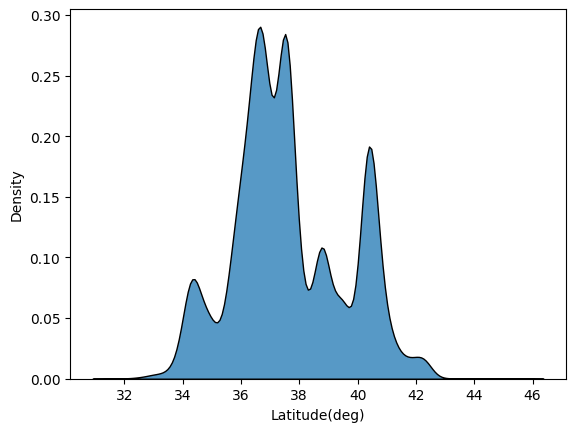

In [5]:
sns.kdeplot(data,x="Latitude(deg)", multiple="stack")

<Axes: xlabel='Longitude(deg)', ylabel='Density'>

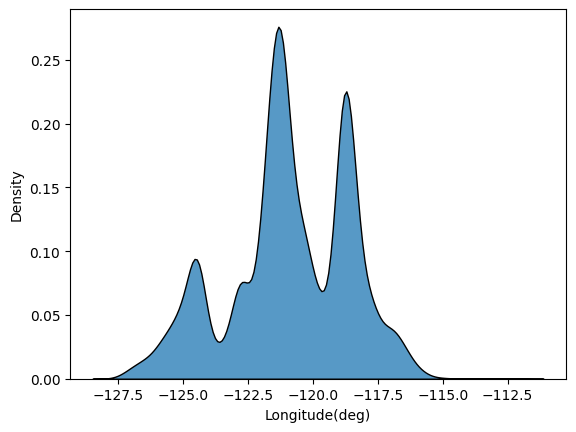

In [6]:
sns.kdeplot(data,x="Longitude(deg)", multiple="stack")


Applying Yeo-Johns Power Transformation to "latitude" and "longitude"

In [7]:
from sklearn.preprocessing import PowerTransformer
lat_transformer = PowerTransformer(method='yeo-johnson', standardize=True)
long_transformer = PowerTransformer(method='yeo-johnson', standardize=True)

<Axes: ylabel='Density'>

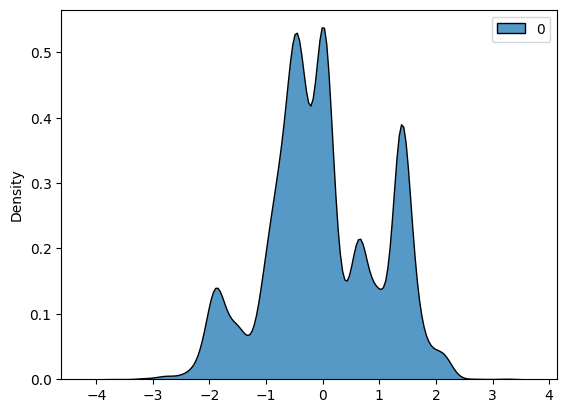

In [8]:
new_lat = lat_transformer.fit_transform(np.array(data['Latitude(deg)']).reshape(-1,1))
sns.kdeplot(new_lat, multiple="stack")

<Axes: ylabel='Density'>

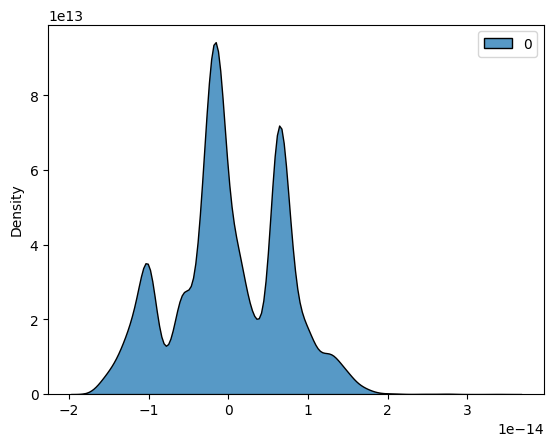

In [9]:
new_long = long_transformer.fit_transform(np.array(data['Longitude(deg)']).reshape(-1,1))
sns.kdeplot(new_long, multiple="stack")